In [1]:
# Use needed libraries
using Random
using SSM
using Distributions
using Plots
using StatsBase
using CSV
using DataFrames
using LinearAlgebra

Random.seed!(1234);

In [2]:
# Define the paths
data_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/My_Changes_And_Data/Chopped_Data/ALM_R4.csv"
kin_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/My_Changes_And_Data/Chopped_Data/Jaw_R4.csv"
tongue_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/My_Changes_And_Data/Chopped_Data/Tongue_R4.csv"
trial_lpath = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/My_Changes_And_Data/Chopped_Data/Trial_End_R4.csv"
first_lick_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/My_Changes_And_Data/Chopped_Data/First_Contact_R4.csv"
PCA_feats_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/My_Changes_And_Data/Chopped_Data/PCA_feats_R4.csv"

# Read in data
data_df = CSV.read(data_path, DataFrame, header=false)
kin_df = CSV.read(kin_path, DataFrame, header=false)
tongue_df = CSV.read(tongue_path, DataFrame, header=false)
lastL_df = CSV.read(trial_lpath, DataFrame, header=false)
firstL_df = CSV.read(first_lick_path, DataFrame, header=false)
PCA_feats = CSV.read(PCA_feats_path, DataFrame, header=false)

# Convert to matrices for easier use
data_matrix = Matrix(data_df)
kin_data = kin_df[:, 1]
tongue_data = tongue_df[:, 1]
lastL = Vector(lastL_df[1, :])
firstL = Vector(firstL_df[1, :])
feats_matrix = Matrix(PCA_feats)

# Adjust licks to sampling rate from MATLAB code
firstL_adjusted = round.(Int, firstL .* 100)
trial_lengths = lastL  # round.(Int, lastL .* 100);

# Initialize storage
kin_trials = Vector{Matrix{Float64}}(undef, length(lastL))
tongue_trials = Vector{Vector{Float64}}(undef, length(lastL))
X = Vector{Matrix{Float64}}(undef, length(lastL))
Y = Vector{Matrix{Float64}}(undef, length(lastL))

# Start slicing and populating the data
start_idx = 1
for i in 1:length(lastL)
    end_idx = start_idx + lastL[i] - 1
        
    # Slice and store tongue data
    tongue_trials[i] = tongue_data[start_idx:end_idx]
    
    # Slice and store neural data for the trial
    trial_data = data_matrix[start_idx:end_idx, :]
    X[i] = trial_data

    # Slice and store kin feats
    feat_trial = feats_matrix[start_idx:end_idx, :]
    Y[i] = feat_trial
    
    # Update the start index for the next trial
    start_idx = end_idx + 1
end


In [3]:
"""
Shuffle the trials and do train/test split of data
"""
# Number of trials
num_trials = length(firstL)

# shuffle the trials
perm = randperm(num_trials)

X_shuffled = X[perm]
Y_shuffled = Y[perm]
trial_lengths_shuffled = trial_lengths[perm]
firstL_adjusted_shuffled = firstL_adjusted[perm]
tongue_trials_shuffled = tongue_trials[perm]

# Define the split ratio
split_ratio = 0.8
split_index = round(Int, split_ratio * num_trials)

# Split the data into training and testing sets
X_train = X_shuffled[1:split_index]
X_test = X_shuffled[split_index+1:end]

Y_train = Y_shuffled[1:split_index]
Y_test = Y_shuffled[split_index+1:end]

trial_lengths_train = trial_lengths_shuffled[1:split_index]
trial_lengths_test = trial_lengths_shuffled[split_index+1:end]

firstL_adjusted_train = firstL_adjusted_shuffled[1:split_index]
firstL_adjusted_test = firstL_adjusted_shuffled[split_index+1:end]

tongue_adjusted_train = tongue_trials_shuffled[1:split_index]
tongue_adjusted_test = tongue_trials_shuffled[split_index+1:end]

13-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.75521, 0.78465, 0.84507, 0.92175, 0.92307, 0.8588]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.63463  …  0.0, 0.0, 0.0, 0.68942, 0.86075, 0.81486, 0.84558, 0.84693, 0.58685, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.74691  …  0.0, 0.0, 0.0, 0.0, 0.67707, 0.83914, 0.85646, 0.85264, 0.80925, 0.69522]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.70872, 0.7705  …  0.0, 0.0, 0.0, 0.71161, 0.7925, 0.76953, 0.76022, 0.62836, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.798, 0.80439, 0.86601, 0.81854, 0.82432, 0.87808]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.68765, 0.83081, 0.87265, 0.88666, 0.91207, 0.84989, 0.73713]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.71499, 0.87456, 0.90137, 0.83888, 0.78668, 0.63467, 0.5304]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

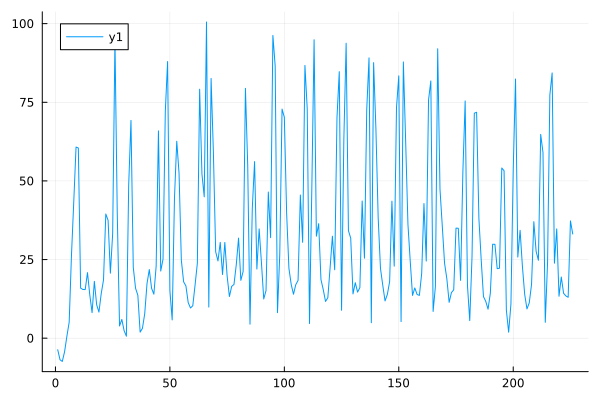

In [4]:
"""
Visualize the kinematic PCs for a trial
"""

trial = 1
plot(Y[trial][:,1])


In [5]:
# Function to create gamma vectors
function construct_gamma(trial_lengths::Vector{Int})
    γ = Vector{Matrix{Float64}}(undef, length(trial_lengths))

    for i in 1:length(trial_lengths)
        trial_length = trial_lengths[i]
        gamma_matrix = zeros(Float64, trial_length, 2)

        End_idx = trial_lengths[i]

        time = 20

        # First GLM weights (first contact + some)
        gamma_matrix[1:time, 1] .= 1.0
        gamma_matrix[1:time, 2] .= 0.0

        # Middle part with no weights  (area we want to learn transition)
        gamma_matrix[time+1:End_idx-time-1, 1] .= 0.0
        gamma_matrix[time+1:End_idx-time-1, 2] .= 0.0

        # Second GLM weights (from trial end and back)
        gamma_matrix[End_idx-time:end, 1] .= 0.0
        gamma_matrix[End_idx-time:end, 2] .= 1.0

        # Construct trial dependent gamma_matrix
        γ[i] = gamma_matrix

    end

    return γ
end


γ_init = construct_gamma(trial_lengths_train)


51-element Vector{Matrix{Float64}}:
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 ⋮
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]
 [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0]

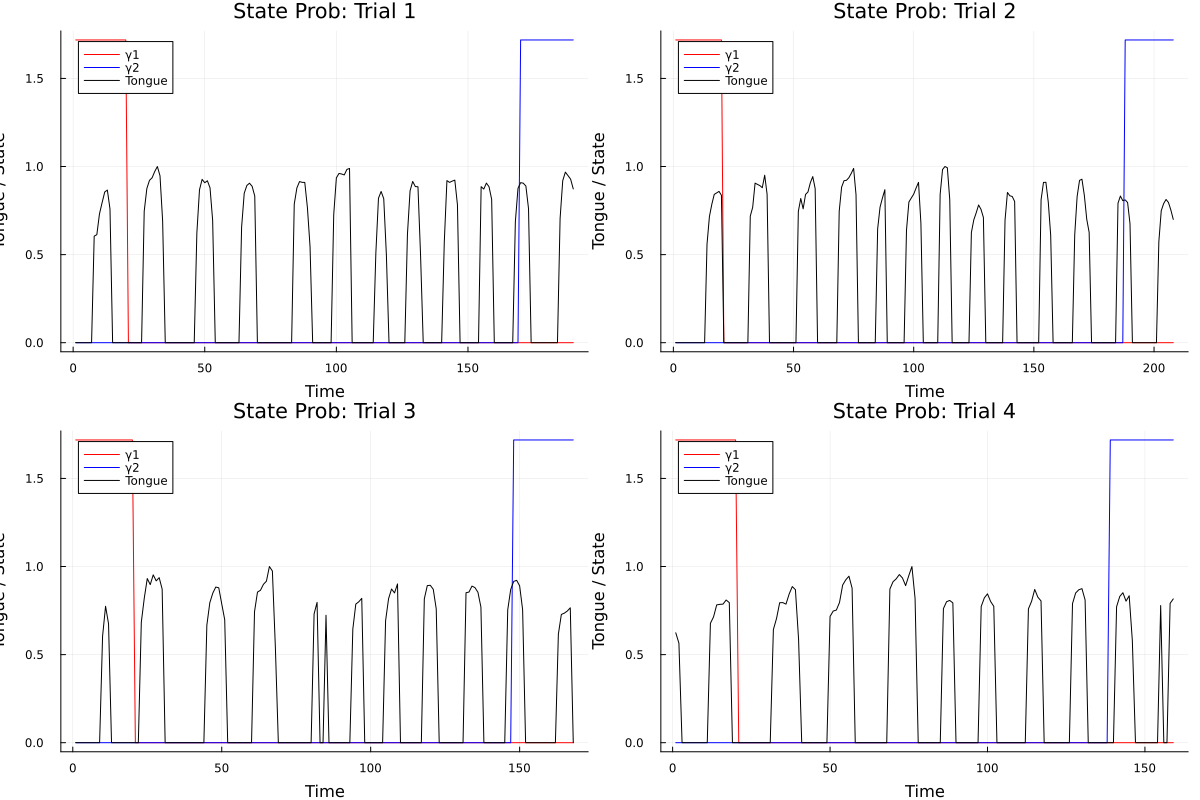

In [6]:
# Plot a couple example trials with the initialization gammas for reference
function plot_init_gammas(trial_num)
    tong = tongue_adjusted_train[trial_num]
    γ_trial = exp.(γ_init[trial_num][:, 1]) .- 1
    γ_trial2 = exp.(γ_init[trial_num][:, 2]) .- 1
    
    plot(γ_trial, label="γ1", color=:red)
    plot!(γ_trial2, label="γ2", color=:blue)
    plot!(tong, label="Tongue", color=:black)
    title!("State Prob: Trial $trial_num")
    ylabel!("Tongue / State")
    xlabel!("Time")
end

# Create a 2x2 grid layout
layout = @layout [a b; c d]

# Generate the 2x2 grid of plots
trials = 1:4
p1 = plot_init_gammas(trials[1])
p2 = plot_init_gammas(trials[2])
p3 = plot_init_gammas(trials[3])
p4 = plot_init_gammas(trials[4])

f = plot(p1, p2, p3, p4, layout=layout)
plot!(size=(1200,800))

In [7]:
# Calculate average trial length
ave_len = mean(trial_lengths)

# We are expecting on average one transition per trial
trans_prob = 1 / ave_len
inv_trans_prob = 1-trans_prob

# Make domain knowledge initialization of transition matrix
A_init = [inv_trans_prob trans_prob; trans_prob inv_trans_prob]

# We are expecting almost everytime to start in the same state
πₖ_init = [0.99;0.01];

In [8]:
# Initialize the Gaussian HMM-GLM
model = SwitchingGaussianRegression(; num_features=57, num_targets=9, K=2, λ=1.0)


# Initialize the model with domain knowledge
model.A = A_init
model.πₖ = πₖ_init
SSM.update_regression!(model, vcat(X_train...), vcat(Y_train...), vcat(γ_init...))

In update regression


In [9]:
# output = SSM.E_step.(Ref(model), X_train, kin_trials_train)
output = SSM.E_step.(Ref(model), X_train, Y_train)
γ, ξ, α = map(x-> x[1], output), map(x-> x[2], output), map(x-> x[3], output)

([[0.0 -38.945657502204995; 0.0 -74.13436757943418; … ; -268.2425922147013 0.0; -333.8600683043878 0.0], [-4.851171979680657e-7 -14.538878496092366; -0.00014410936273634434 -8.845010129207367; … ; -91.94163810037207 0.0; -137.89358927582725 0.0], [-1.8189894035458565e-10 -22.430442652523197; -3.637978807091713e-12 -26.577503243701358; … ; -41.334686246918864 0.0; -29.887206724659336 0.0], [0.0 -152.82148369601418; 0.0 -59.416366622186615; … ; -104.95433472537115 0.0; -52.970984232917544 0.0], [0.0 -172.15119817741652; 0.0 -324.9647553008508; … ; -458.5511350819579 0.0; -328.9689377289651 0.0], [0.0 -91.40161001946763; 0.0 -117.99425517575582; … ; -367.9328616734383 0.0; -222.9237319814747 0.0], [-14.679998429121042 -4.212670319247991e-7; -0.012801500859495718 -4.3645867823579465; … ; -46.93552478911806 0.0; -91.69620689102157 0.0], [0.0 -119.36879432181377; 0.0 -95.46401598814191; … ; -272.2632226300375 0.0; -238.39131142284168 0.0], [0.0 -91.85598479854525; 0.0 -136.8503608887695; … ;

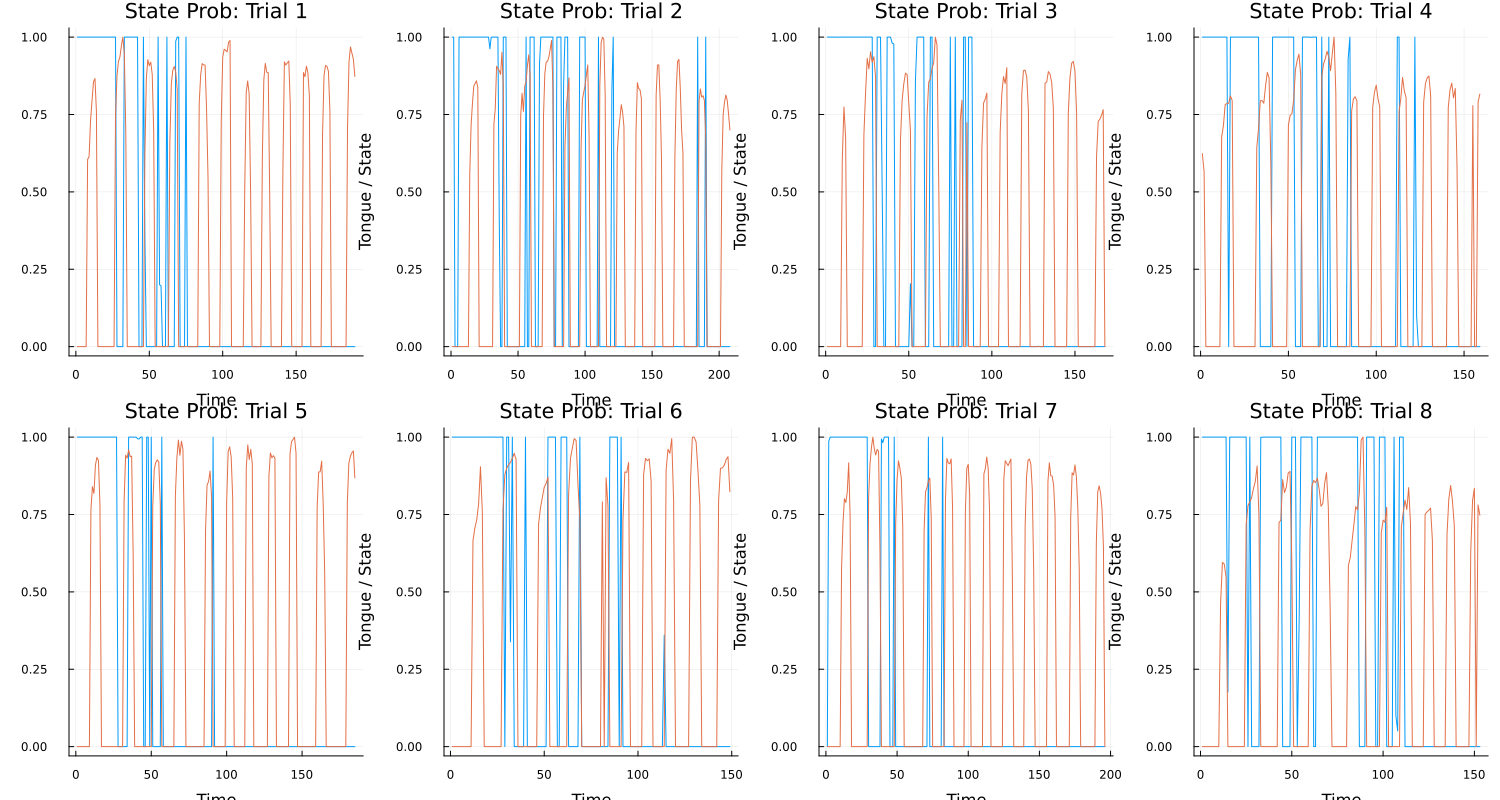

In [10]:
function plot_trial(trial_num)
    tong = tongue_adjusted_train[trial_num]
    γ_trial = exp.(γ[trial_num][:, 1])
    
    plot(γ_trial, label="P(State 1)", legend=false)
    plot!(tong, label="Tongue")
    title!("State Prob: Trial $trial_num")
    ylabel!("Tongue / State")
    xlabel!("Time")
end

# Create a 2x2 grid layout
layout = @layout [a b c d ; e f g h]

trials = 1:8
# Generate the 2x2 grid of plots
p1 = plot_trial(trials[1])
p2 = plot_trial(trials[2])
p3 = plot_trial(trials[3])
p4 = plot_trial(trials[4])
p5 = plot_trial(trials[5])
p6 = plot_trial(trials[6])
p7 = plot_trial(trials[7])
p8 = plot_trial(trials[8])

f = plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=layout)
plot!(size=(1500,800))

In [11]:
# Train the domain-knowledge initiated model to see what it finds
ll, A_stor, π_stor, β1_stor, β2_stor, σ1_stor, σ2_stor = SSM.fit!(model, X_train, Y_train, 20, 1e-6, false);
println("πₖ: ", model.πₖ)
println("A: ", model.A)

Log-Likelihood at iter 1: -1.4394589195969822e6
In update regression
Log-Likelihood at iter 2: -780834.5466030746
In update regression
Log-Likelihood at iter 3: -780412.0171618649
In update regression
Log-Likelihood at iter 4: -775055.6626093977
In update regression
Log-Likelihood at iter 5: -773674.1465375873
In update regression
Log-Likelihood at iter 6: -773174.3413770364
In update regression
Log-Likelihood at iter 7: -773174.3396904408
In update regression
Log-Likelihood at iter 8: -773174.3396904409
In update regression
πₖ: [0.0, 1.0]
A: [0.625 0.37500000000000006; 0.00015321756894790602 0.9998467824310521]


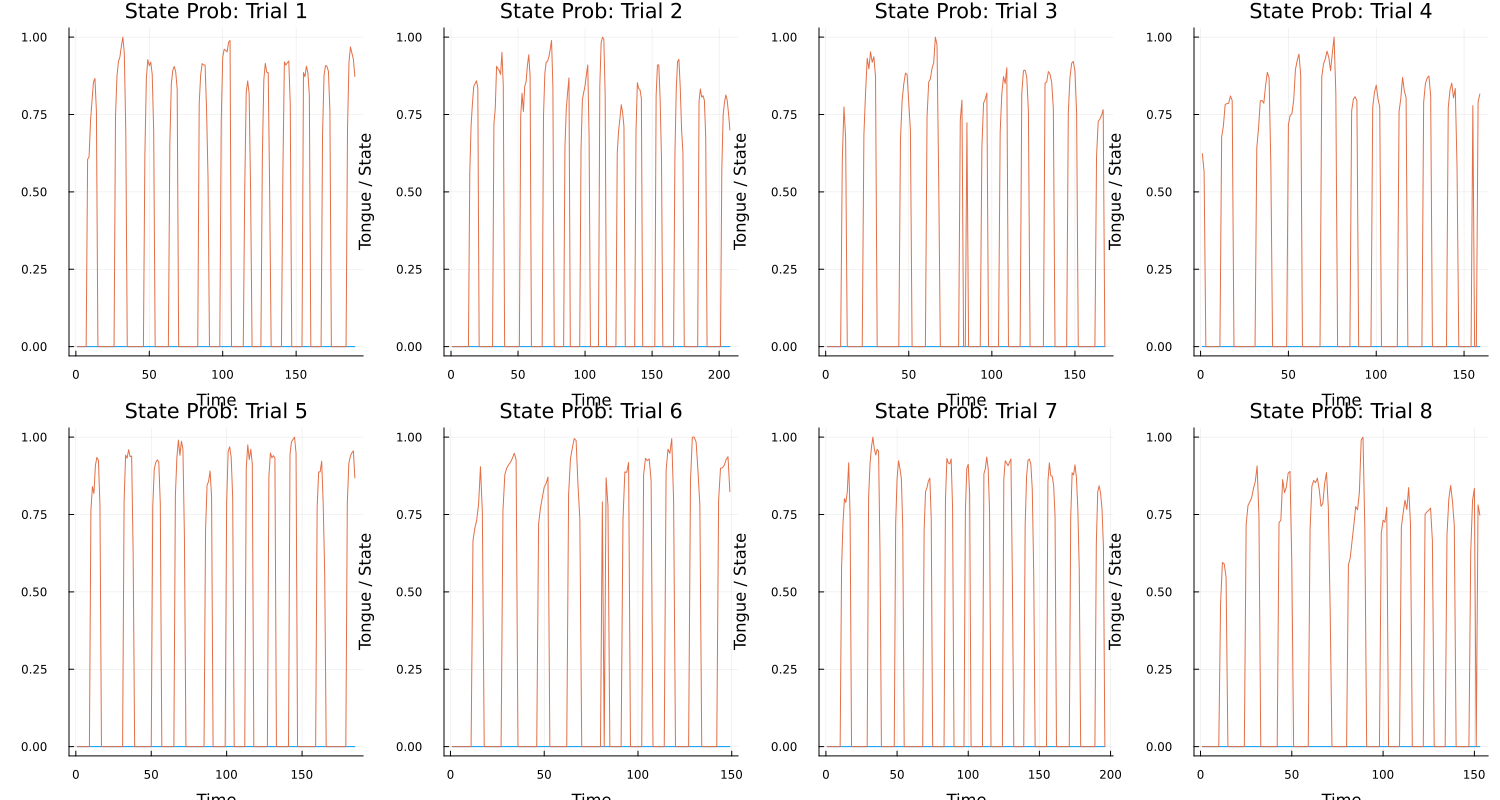

In [12]:
"""
Plot Performance on Training and Testing Sets
"""
function plot_trial(trial_num)
    tong = tongue_adjusted_train[trial_num]
    γ_trial = exp.(γ[trial_num][:, 1])
    
    plot(γ_trial, label="P(State 1)", legend=false)
    #plot!(tong[tau:end], label="Tongue")
    plot!(tong, label="Tongue")
    title!("State Prob: Trial $trial_num")
    ylabel!("Tongue / State")
    xlabel!("Time")
end

output = SSM.E_step.(Ref(model), X_train, Y_train)
γ, ξ, α = map(x-> x[1], output), map(x-> x[2], output), map(x-> x[3], output)
ll_train = sum(map(α -> SSM.logsumexp(α[end, :]), α))

# Create a 2x2 grid layout
layout = @layout [a b c d;e f g h]

trials=1:8
p1 = plot_trial(trials[1])
p2 = plot_trial(trials[2])
p3 = plot_trial(trials[3])
p4 = plot_trial(trials[4])
p5 = plot_trial(trials[5])
p6 = plot_trial(trials[6])
p7 = plot_trial(trials[7])
p8 = plot_trial(trials[8])

f = plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=layout)
plot!(size=(1500,800))


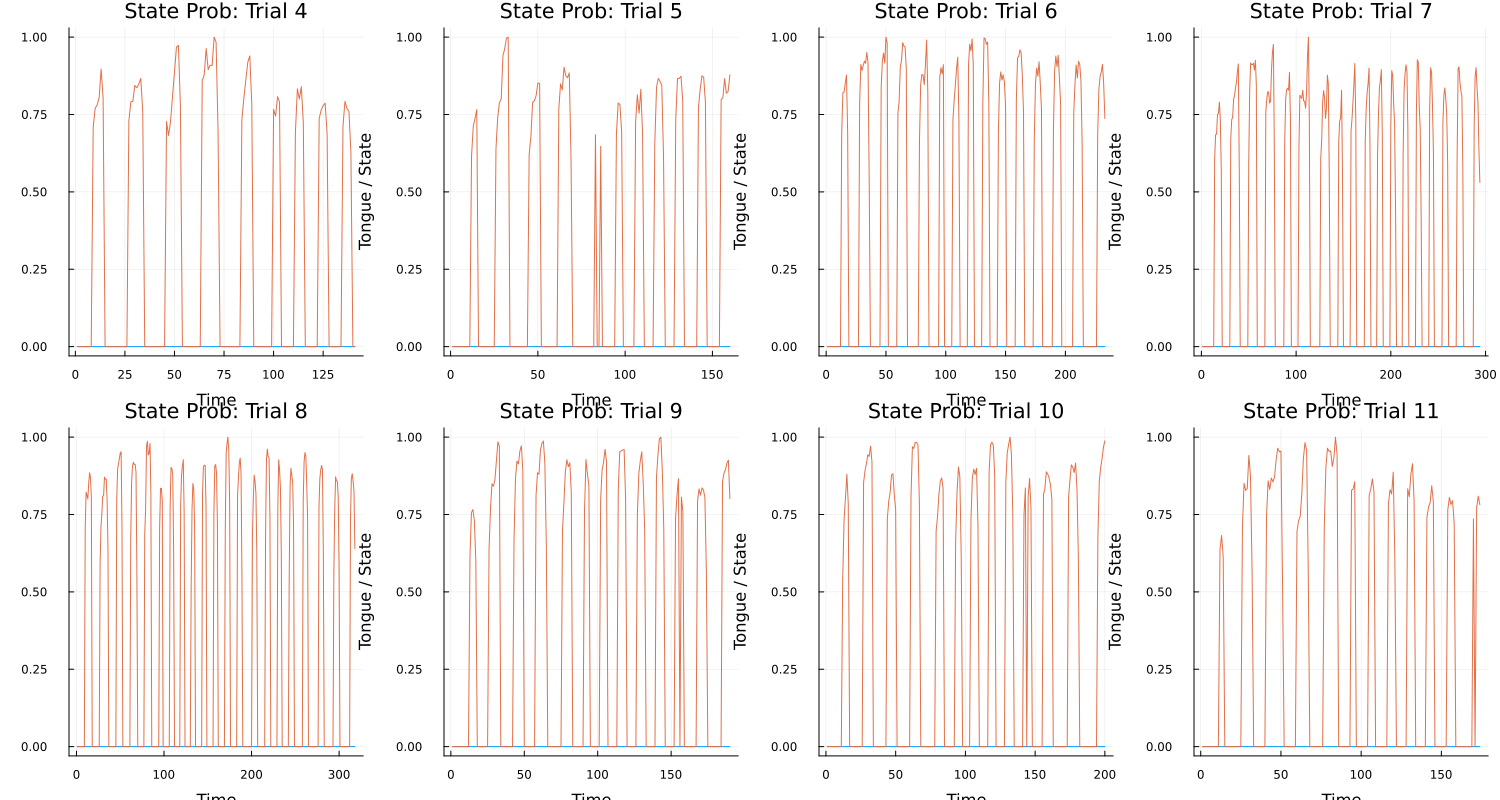

In [13]:
# Function to plot a single trial
function plot_trial_test(trial_num)
    tong = tongue_adjusted_test[trial_num]
    γ_trial = exp.(γ[trial_num][:, 1])

    # Create a new plot for each trial
    p = plot()
    plot!(p, γ_trial, label="P(State 1)", legend=false)
    plot!(p, tong, label="Tongue")
    title!(p, "State Prob: Trial $trial_num")
    ylabel!(p, "Tongue / State")
    xlabel!(p, "Time")
    return p
end

# X_test = DM_session_test
# kin_trials_test = kin_adjusted_all_test
output = SSM.E_step.(Ref(model), X_test, Y_test)
γ, ξ, α = map(x-> x[1], output), map(x-> x[2], output), map(x-> x[3], output)
ll_test = sum(map(α -> SSM.logsumexp(α[end, :]), α))


# Create a 2x2 grid layout
layout = @layout [a b c d; e f g h]

# Generate the 2x2 grid of plots
trials = 4:12
plots = [plot_trial_test(trials[i]) for i in 1:8]

# Combine the plots into a grid
f1 = plot(plots..., layout=layout, size=(1500, 800))

# Display the combined plot
display(f1)


In [14]:
model.B[1].regression.Σ

9×9 Matrix{Float64}:
  1.0e-12      -9.64482e-28   3.12225e-28  …   8.56594e-29   1.80251e-28
 -9.64482e-28   1.0e-12      -1.95365e-28     -5.31194e-29  -1.11388e-28
  3.12225e-28  -1.95365e-28   1.0e-12          1.78831e-29   3.8024e-29
  4.88175e-28  -3.04718e-28   9.98687e-29      3.16393e-29   7.00061e-29
  1.86739e-28  -1.16279e-28   3.8486e-29       1.35001e-29   3.07962e-29
  1.03668e-27  -6.48646e-28   2.10488e-28  …   5.94845e-29   1.26566e-28
 -4.69081e-28   2.96001e-28  -9.2682e-29      -1.45287e-29  -2.17448e-29
  8.56594e-29  -5.31194e-29   1.78831e-29      1.0e-12       1.72554e-29
  1.80251e-28  -1.11388e-28   3.8024e-29       1.72554e-29   1.0e-12

In [17]:
println(ll_train)
println(ll_test)

1719.3110851171125
395.7916292704041


In [16]:
println(model.A)
println(model.πₖ)

[0.978109119678346 0.02189088032165398; 0.015592242035396168 0.9844077579646038]
[0.9442417660750821, 0.055758233924917626]


In [83]:
# Data paths
# """
# data_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/SMM_Branch/ssm_julia/TD1d_R4R_Lick4_Trials_Normalized_ALM_350T_57N_31t.csv"
# kin_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/SMM_Branch/ssm_julia/TD1d_R4C_Trials_Jaw_View1Y_Right.csv"
# tongue_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/SMM_Branch/ssm_julia/TD1d_R4C_Trials_Tongue_Right.csv"

# timepoints = 350
# neurons = 57
# trials = 31
# """

# data_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/SMM_Branch/ssm_julia/TD1d_R4R_Lick1_Trials_Normalized_ALM_350T_57N_43t.csv"
# kin_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/SMM_Branch/ssm_julia/TD1d_R4C_Lick1_Trials_Jaw_View1Y_Right.csv"
# tongue_path = "C:/Users/zachl/OneDrive/BU_YEAR1/Research/SMM_Branch/ssm_julia/TD1d_R4C_Lick1_Trials_Tongue_Right.csv"

# timepoints = 350
# neurons = 57
# trials = 43

# # Read the CSV file
# data_df = CSV.read(data_path, DataFrame, header=false)
# kin_path = CSV.read(kin_path, DataFrame, header=false)
# tongue_path = CSV.read(tongue_path, DataFrame, header=false)

# # Convert DataFrame to a Matrix
# data_matrix = Matrix(data_df)
# kin_matrix = Matrix(kin_path)
# tongue_matrix = Matrix(tongue_path)

# kin_matrix = kin_matrix[:, 1:trials]
# tongue_matrix = tongue_matrix[:, 1:trials]

# # Convert kinematics data to Vector{Vector{Float64}}
# kin = [kin_matrix[:, i] for i in 1:size(kin_matrix, 2)]
# tongue = [tongue_matrix[:, i] for i in 1:size(tongue_matrix, 2)]

# # Reshape the data to a 3D array (timepoints, trials, neurons)
# data_3d = reshape(data_matrix, timepoints, trials, neurons)

# # Initialize the vector of matrices
# X = Vector{Matrix{Float64}}(undef, trials)

# # Populate the vector with each trial's data
# for trial in 1:trials
#     X[trial] = data_3d[:, trial, :]
# end

# # Check the shape of the first trial's data
# println("Shape of X: ", size(X))
# println("Shape of X[1]: ", size(X[1]))


Shape of X: (43,)
Shape of X[1]: (350, 57)


In [3]:
# # Create function to make design matrix for a trial
# function trial_DM(N, tau, T, X, kin)
#     # Initialize the design matrix
#     design_matrix = zeros(T - tau + 1, N * tau)

#     # Populate the design matrix
#     for t in tau:T
#         for n in 1:N
#             design_matrix[t - tau + 1, (n - 1) * tau + 1:n * tau] = X[t - tau + 1:t, n]'
#         end
#     end

#     # Clip the kinematics
#     kin_adjusted = kin[tau:end];

#     # Convert design_matrix to type Matrix{Float64}
#     design_matrix = Matrix{Float64}(design_matrix)

#     return design_matrix, kin_adjusted
# end

# N = neurons
# tau = 20
# T = timepoints

# # Loop over trials to make session design matrix
# DM_session = Vector{Matrix{Float64}}()
# kin_adjusted_all = Vector{Vector{Float64}}()

# for i in 1:length(X)
#     design_matrix, kin_adjusted = trial_DM(N, tau, T, X[i], kin[i])
#     push!(DM_session, design_matrix)
#     push!(kin_adjusted_all, kin_adjusted)
# end

# # Check the size of the first trial's data
# println("Size of DM_session: ", size(DM_session))
# println("Size of DM_session[1]: ", size(DM_session[1]))
# println("Size of kin_adjusted_all: ", size(kin_adjusted_all))
# println("Size of kin_adjusted_all[1]: ", size(kin_adjusted_all[1]))

UndefVarError: UndefVarError: `neurons` not defined

In [4]:
# Initialize the model and prep data for use in model
model = SwitchingGaussianRegression(;K=2, λ=1.0)

# Train the model
ll, A_stor, π_stor, β1_stor, β2_stor, σ1_stor, σ2_stor = SSM.fit!(model, DM_session, kin_adjusted_all, 200, 1e-6, true);
println("πₖ: ", model.πₖ)
println("A: ", model.A)

Log-Likelihood at iter 1: -251938.810599278
[0.6195466667881083 0.38045333321189173; 0.197415577804854 0.802584422195146]
[0.3247658640482196, 0.6752341359517804]
Log-Likelihood at iter 2: 3805.0044073123304
[0.8096543457126576 0.19034565428734987; 0.33926047555712335 0.6607395244428653]
[0.5794008716759416, 0.42059912832407237]
Log-Likelihood at iter 3: 4376.918928840378
[0.8243991487171869 0.1756008512828097; 0.31347487194941065 0.6865251280505882]
[0.564234986852024, 0.4357650131479786]
Log-Likelihood at iter 4: 4838.101718320767
[0.8380205396098289 0.16197946039017025; 0.2534005731369741 0.7465994268630225]
[0.5448274832597296, 0.45517251674026854]
Log-Likelihood at iter 5: 5178.12721412367
[0.8548472938092482 0.14515270619074544; 0.19938152422597624 0.8006184757740221]
[0.5431812282556969, 0.4568187717443041]
Log-Likelihood at iter 6: 5396.870817900586
[0.8695683102751279 0.13043168972487099; 0.16677037329401306 0.8332296267059817]
[0.5527858770018884, 0.44721412299811136]
Log-Lik

In [23]:
# function to save model parameters and history
function save_model(m, ll_hist)

    # Construct vectors to store in .csv
    vector1 = m.B[1].regression.β
    vector2 = m.B[2].regression.β
    vector3 = [m.B[1].regression.σ²]
    vector4 = [m.B[2].regression.σ²]
    vector5 = ll_hist
    vector6 = vcat(m.A...)
    vector7 = m.πₖ

    # Determine the maximum length
    max_length = maximum([length(vector1), length(vector2), length(vector3), length(vector4), length(vector5), length(vector6), length(vector7)])

    # Pad vectors to the maximum length
    vector1_padded = vcat(vector1, fill(missing, max_length - length(vector1)))
    vector2_padded = vcat(vector2, fill(missing, max_length - length(vector2)))
    vector3_padded = vcat(vector3, fill(missing, max_length - length(vector3)))
    vector4_padded = vcat(vector4, fill(missing, max_length - length(vector4)))
    vector5_padded = vcat(vector5, fill(missing, max_length - length(vector5)))
    vector6_padded = vcat(vector6, fill(missing, max_length - length(vector6)))
    vector7_padded = vcat(vector7, fill(missing, max_length - length(vector7)))

    # Convert vectors to a DataFrame
    df = DataFrame(Vector1 = vector1_padded, Vector2 = vector2_padded, Vector3 = vector3_padded, Vector4 = vector4_padded, Vector5 = vector5_padded, Vector6 = vector6_padded, Vector7 = vector7_padded)

    # Write DataFrame to CSV
    CSV.write("R4_FIXED_HMM_First200ms_Lamda1_Sticky.csv", df)

end


save_model(model, ll)
#model = read_model("R4_FIXED_GLM.csv")

"R4_FIXED_HMM_First200ms_Lamda1_Sticky.csv"

In [20]:
function z_score(x::Vector{})
    return (x.-minimum(x)) ./ (maximum(x).-minimum(x))
end

z_score (generic function with 1 method)

In [7]:
output = SSM.E_step.(Ref(model), DM_session, kin_adjusted_all)
γ, ξ, α = map(x-> x[1], output), map(x-> x[2], output), map(x-> x[3], output)

([[0.0 -Inf; -2.020820227002975 -0.1421936038804219; … ; -0.0019495770283803893 -6.24111746860325; -0.030133625203788483 -3.5171425924137765], [0.0 -Inf; -0.0011917836881423227 -6.732900029144233; … ; -0.7994472887861406 -0.5970688993114948; -0.8451032280722472 -0.5612649287332516], [0.0 -Inf; -0.00016877259346870233 -8.687042735121082; … ; -4.142428252904551 -0.016011740171052224; -4.199993624257729 -0.015109244346319883], [0.0 -Inf; -0.004285875946367312 -5.454572498877104; … ; -0.4020963375593267 -1.105384067964508; -0.4637113267773578 -0.9914052161933118], [0.0 -Inf; -0.060910764491211467 -2.828646161691907; … ; -1.8158187931827712 -0.17757838232151357; -1.7547712968306826 -0.18988624654608088], [0.0 -Inf; -0.17779078254783087 -1.814726471868184; … ; -7.907591090095067 -0.0003680075543144312; -6.763531098709379 -0.0011558107317455324], [0.0 -Inf; -0.20695629487266842 -1.676941806701933; … ; -18.18674940001911 -1.2635581470021862e-8; -20.56315752245891 -1.1736318583643879e-9], [0.0 

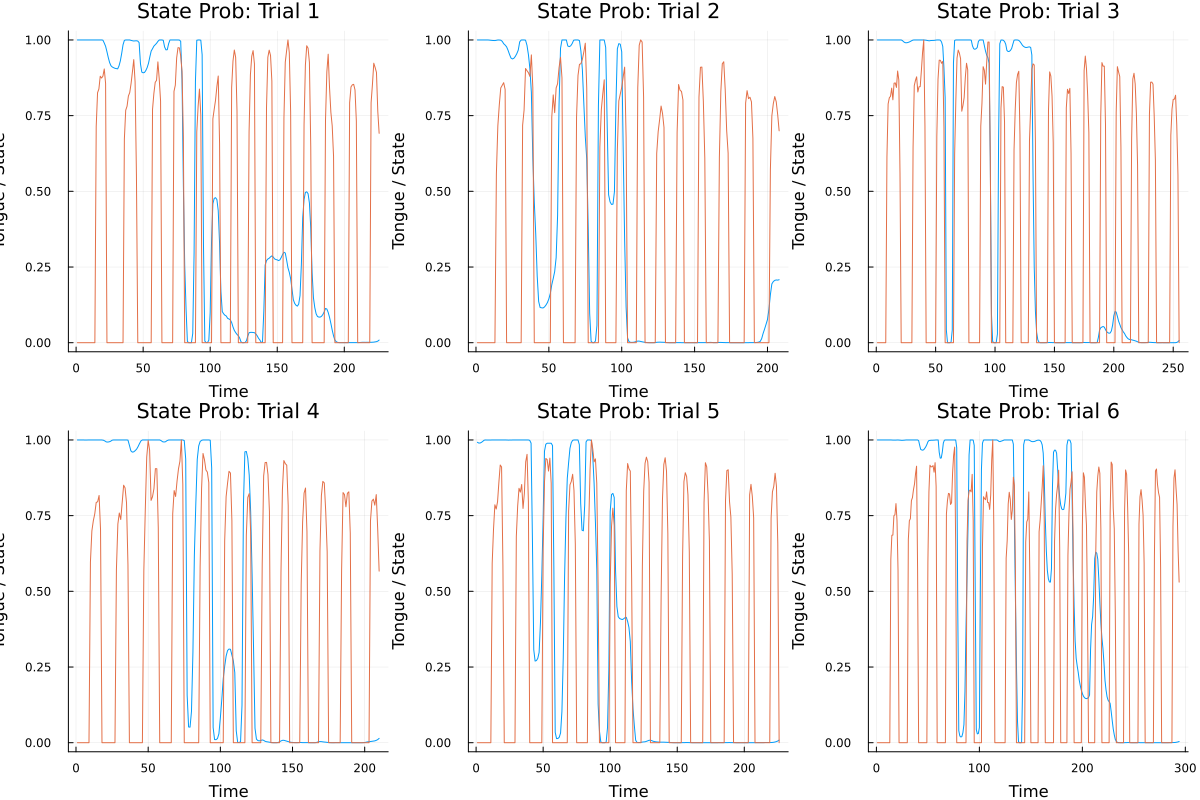

In [16]:
# Function to plot a single trial
function plot_trial(trial_num)
    tong = tongue_trials[trial_num]
    ki = kin_adjusted_all[trial_num]
    γ_trial = exp.(γ[trial_num][:, 2])
    
    plot(γ_trial, label="P(State 1)", legend=false)
    plot!(tong[tau:end], label="Tongue")
    title!("State Prob: Trial $trial_num")
    ylabel!("Tongue / State")
    xlabel!("Time")
end

function plot_trial_no_kernel(trial_num)
    tong = tongue_trials[trial_num]
    ki = kin_trials[trial_num]
    γ_trial = exp.(γ[trial_num][:, 1])
    
    plot(γ_trial, label="P(State 1)", legend=false)
    plot!(tong, label="Tongue")
    title!("State Prob: Trial $trial_num")
    ylabel!("Tongue / State")
    xlabel!("Time")
end

# Create a 2x2 grid layout
layout = @layout [a b c; d r f]

# Generate the 2x2 grid of plots
trials = 1:6
p1 = plot_trial_no_kernel(trials[1])
p2 = plot_trial_no_kernel(trials[2])
p3 = plot_trial_no_kernel(trials[3])
p4 = plot_trial_no_kernel(trials[4])
p5 = plot_trial_no_kernel(trials[5])
p6 = plot_trial_no_kernel(trials[6])


f = plot(p1, p2, p3, p4, p5, p6, layout=layout)
plot!(size=(1200,800))
#savefig(f, "c::/Users/zachl/OneDrive/BU_Year1/Research/SMM_Branch/ssm_julia/Figures/Decoding_L1.png");


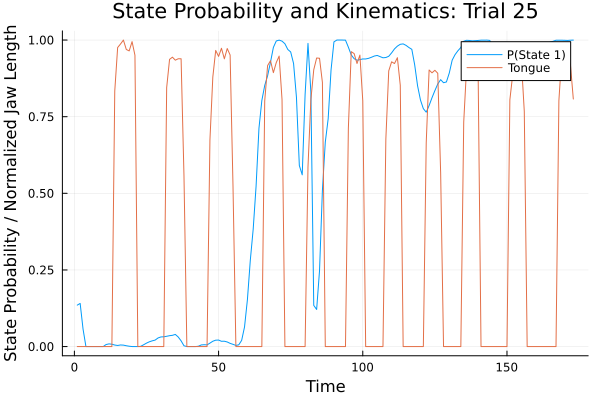

In [9]:
output = SSM.E_step.(Ref(model), DM_session, kin_adjusted_all)
γ, ξ, α = map(x-> x[1], output), map(x-> x[2], output), map(x-> x[3], output)


trial = 18
tong = tongue_trials[trial]
ki = kin_adjusted_all[trial]

plot(exp.(γ[trial][:,2]), label="P(State 1)", legend=:topright)
#plot!(ki, label="Jaw Length")
plot!(tong[tau:end], label="Tongue")
title!("State Probability and Kinematics: Trial 25")
ylabel!("State Probability / Normalized Jaw Length")
xlabel!("Time")

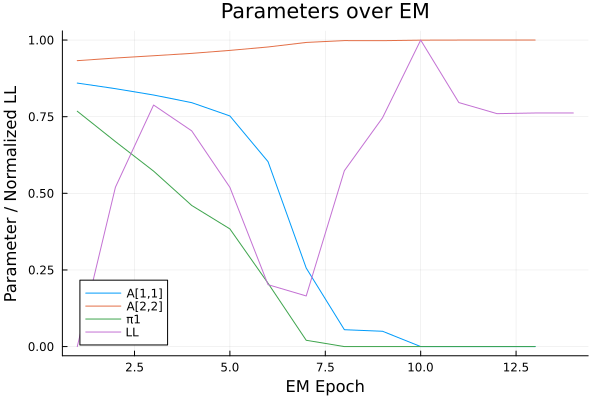

In [21]:
# Extract stored parameters to plot
A11 = [A[1,1] for A in A_stor];
A22 = [A[2,2] for A in A_stor];
π1 = [π[1] for π in π_stor];


# Plot the parameters
fig3 = plot(A11[3:end], label="A[1,1]")
plot!(A22[3:end], label="A[2,2]")
plot!(π1[3:end], label="π1")
plot!(z_score(ll[3:end]), label="LL")
title!("Parameters over EM")
xlabel!("EM Epoch")
ylabel!("Parameter / Normalized LL")
#savefig(fig3, "c::/Users/zachl/OneDrive/BU_Year1/Research/Guassian_GLM_HMM_forTudor/ssm_julia/Figures/Session_NoConverge_HMM_Params.png");

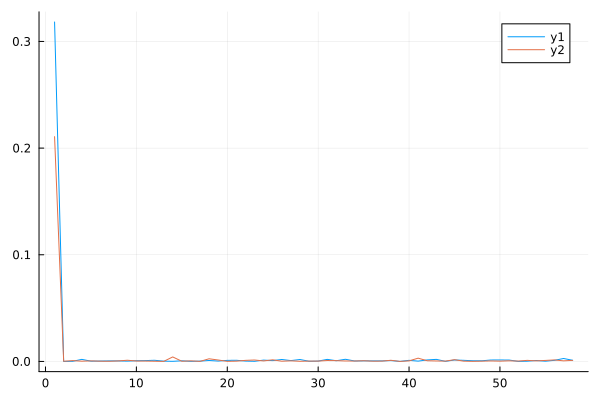

In [22]:
plot(abs.(model.B[1].regression.β))
plot!(abs.(model.B[2].regression.β))